# Introduction

#In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals,
#organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until 
#it is repaid as well as to repay the principal amount borrowed.

# loan Status is target value

# import libraries

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [117]:
#read dataset
data = pd.read_csv(r"C:\Users\HARDIK\Documents\lone aproval prediction\loan_data_set.csv")

In [118]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [120]:
data.shape

(614, 13)

In [121]:
#check mean and max-  idea about the outliear
#below is numerial data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [122]:
#categorical description
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [123]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [124]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
# we have a 2 types of data
# Numerical data - fill using mean
# Categorical data -fill using mode

In [126]:
#fill categorical value using mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [127]:
#check null values
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [128]:
#fill numrical value sing median
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [129]:
#check null values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# outliers detecting and Handling

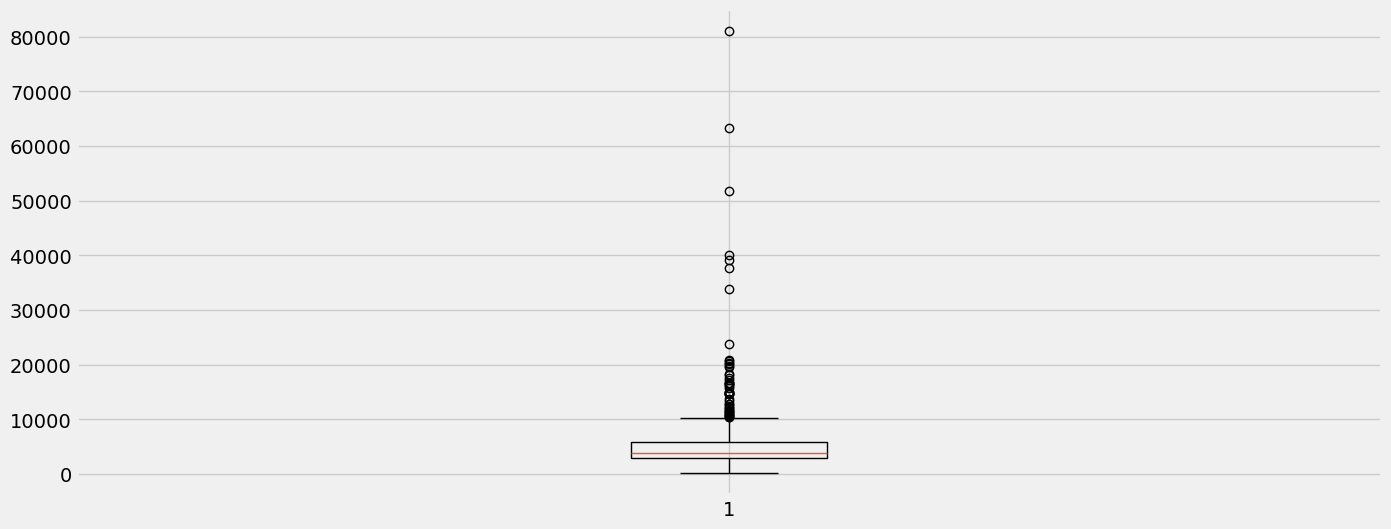

In [130]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

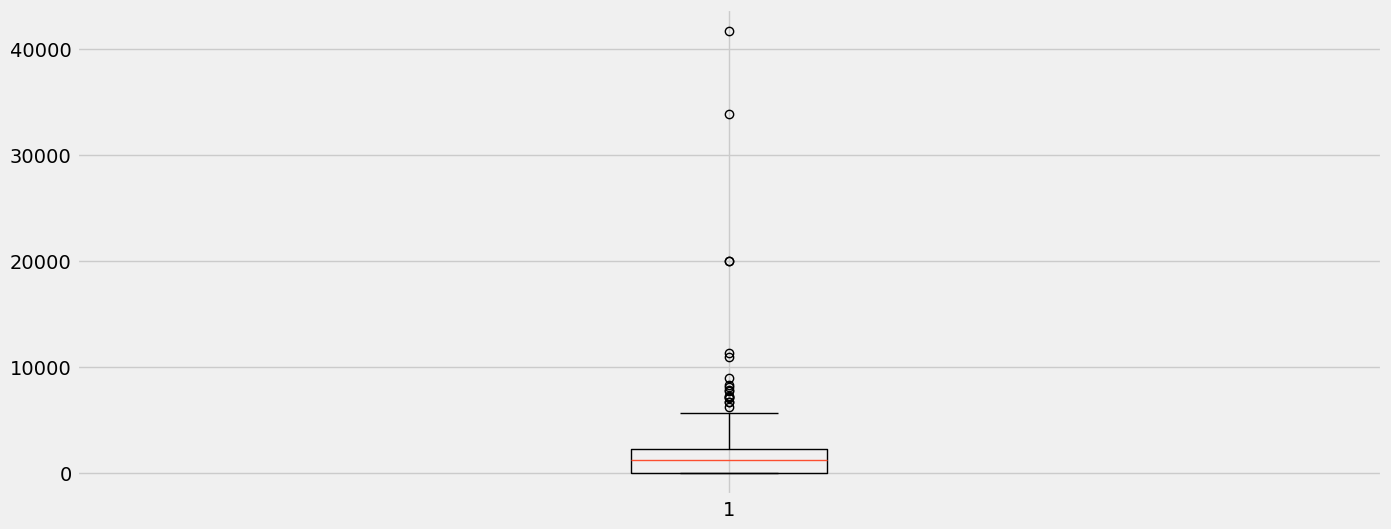

In [131]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

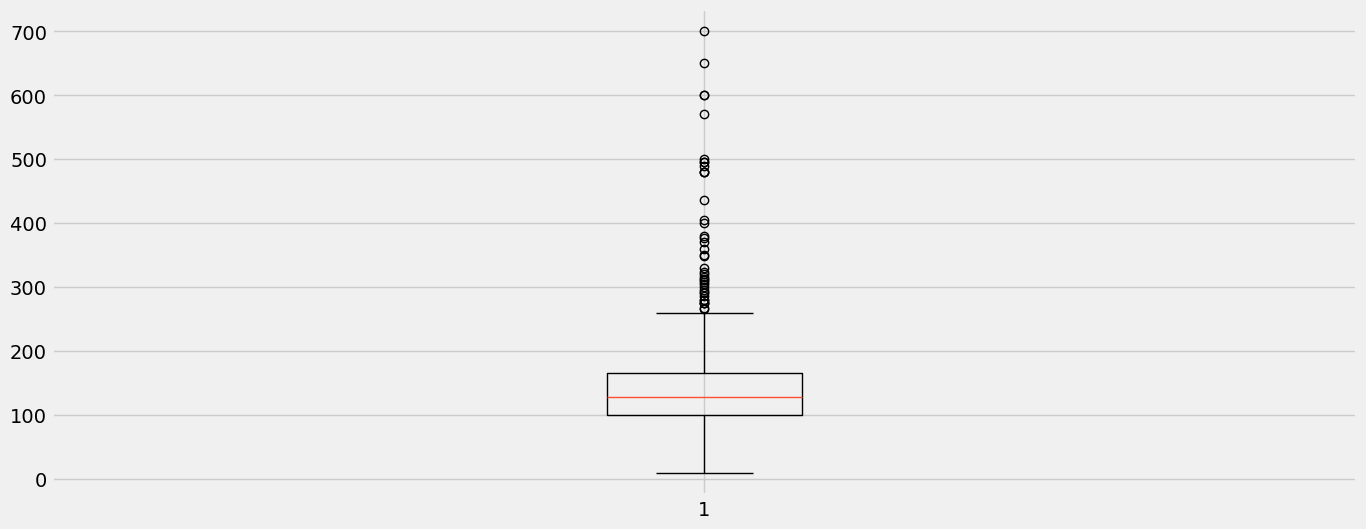

In [132]:
plt.boxplot(data['LoanAmount'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


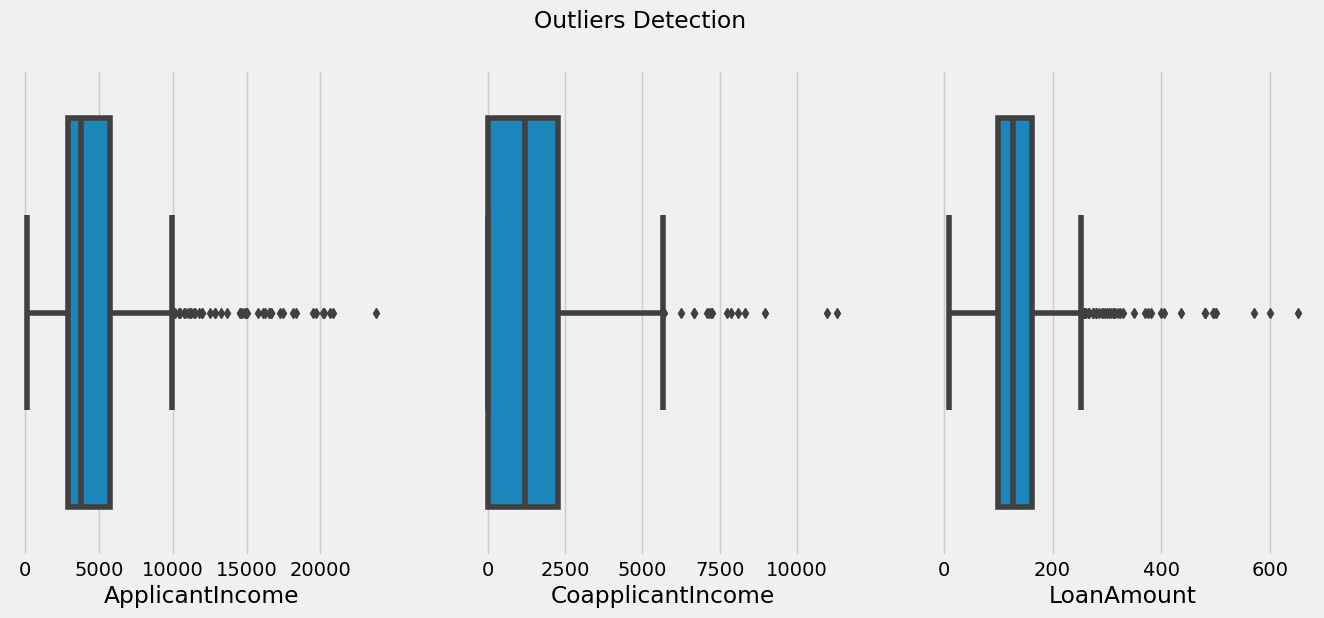

In [136]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [137]:
#condtion apply for given a customer 0 -25000 for ApplicantIncome

print('Before removing the outliears', data.shape)

data = data[data['ApplicantIncome'] < 25000]

print('After Removing the outliers', data.shape)

Before removing the outliears (603, 13)
After Removing the outliers (603, 13)


In [138]:
#condtion apply for given a customer 0 -12000 for CoapplicantIncome

print('Before removing the outliears', data.shape)

data = data[data['CoapplicantIncome'] < 12000]

print('After Removing the outliers', data.shape)

Before removing the outliears (603, 13)
After Removing the outliers (603, 13)


In [139]:
#condtion apply for given a customer 0 -400 for ApplicantIncome

print('Before removing the outliears', data.shape)

data = data[data['LoanAmount'] < 400]

print('After Removing the outliers', data.shape)

Before removing the outliears (603, 13)
After Removing the outliers (591, 13)


# Analysis

In [140]:
#check data is normally distrbution or not using distlot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

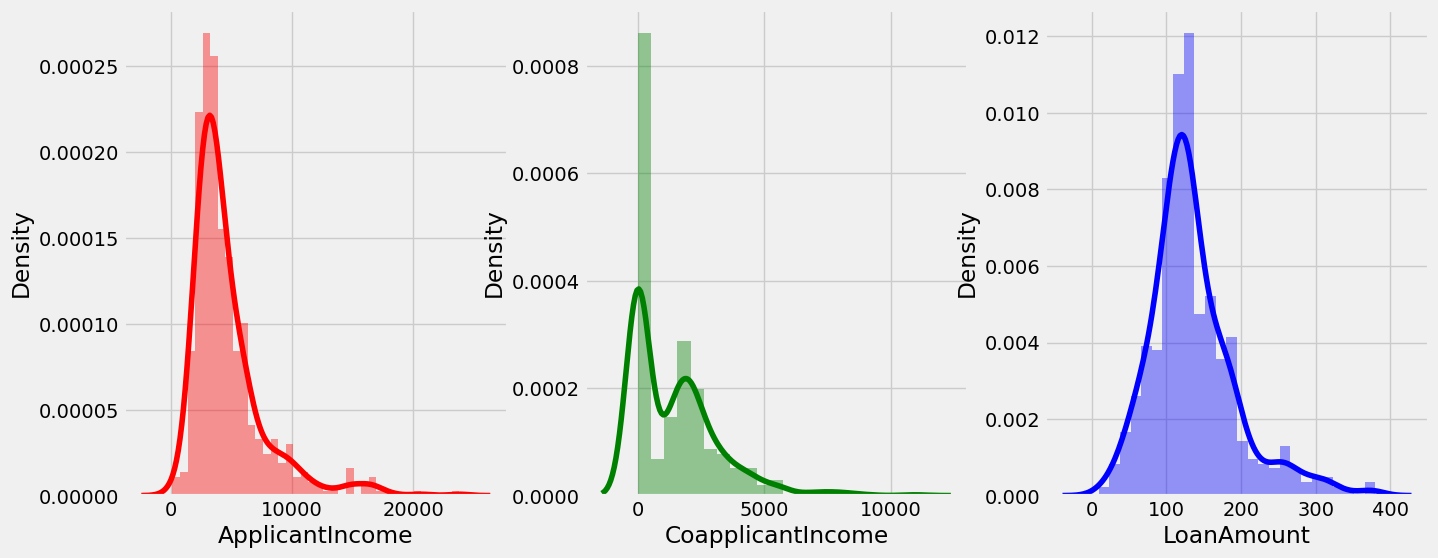

In [141]:
plt.subplot(1, 3, 1)  #1=row, 3=graphs, 1=graph
sns.distplot(data['ApplicantIncome'], color = 'red')

plt.subplot(1, 3, 2)  #1=row, 3=graphs, 1=graph
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)  #1=row, 3=graphs, 1=graph
sns.distplot(data['LoanAmount'], color = 'blue')

#here applicantincome and coapplicant income both are not normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

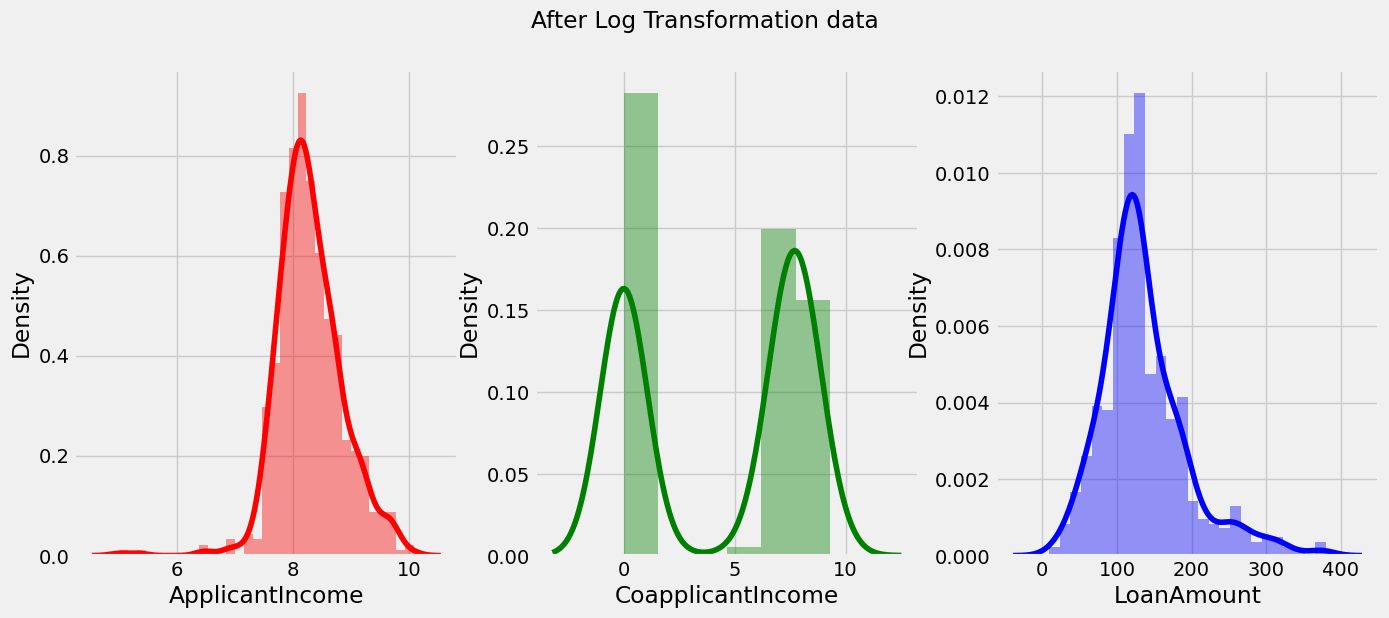

In [142]:
#here both apllicant income and cpapplicant income become normally distribution.

data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1, 3, 1)  #1=row, 3=graphs, 1=graph
sns.distplot(data['ApplicantIncome'], color = 'red')

plt.subplot(1, 3, 2)  #1=row, 3=graphs, 1=graph
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1, 3, 3)  #1=row, 3=graphs, 1=graph
sns.distplot(data['LoanAmount'], color = 'blue')

plt.suptitle("After Log Transformation data")
plt.show()

In [143]:
#seperate numerical data and categorical data
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [144]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [145]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

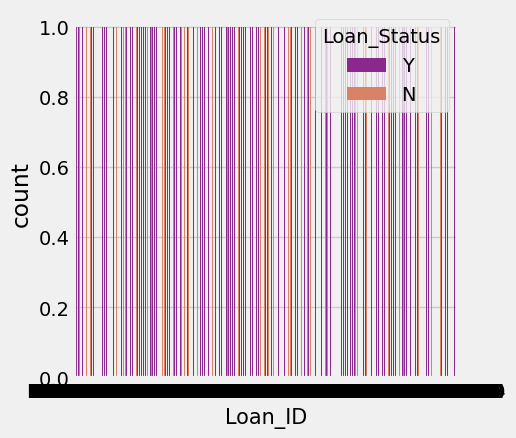

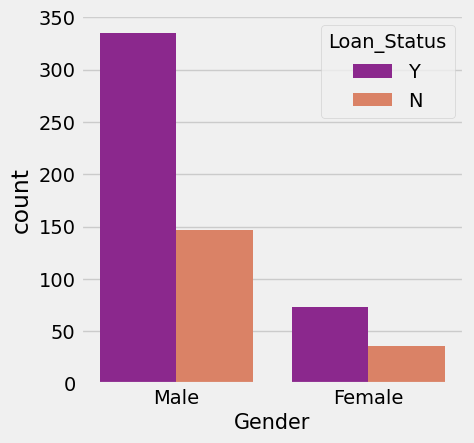

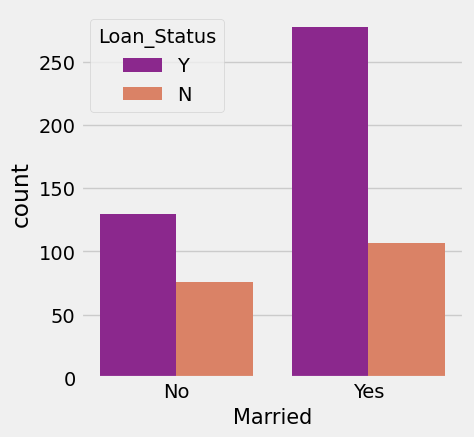

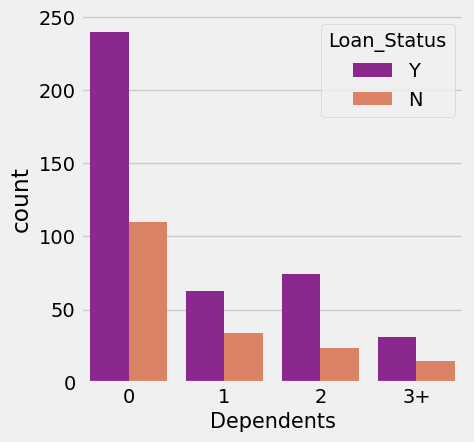

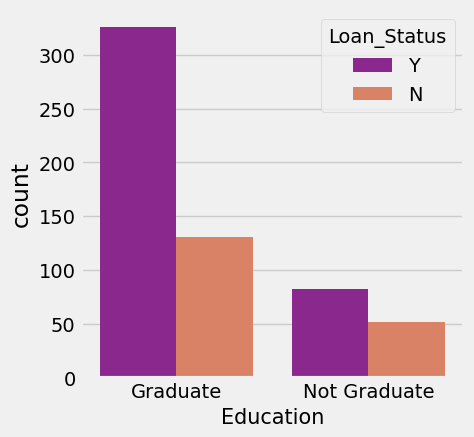

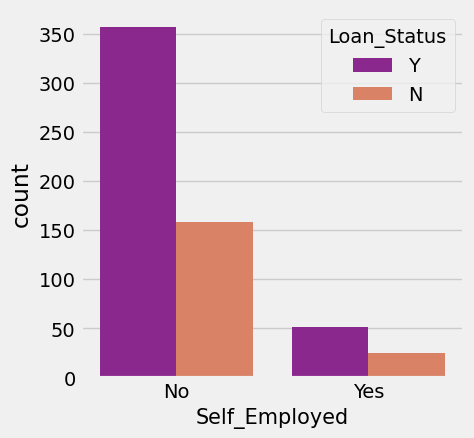

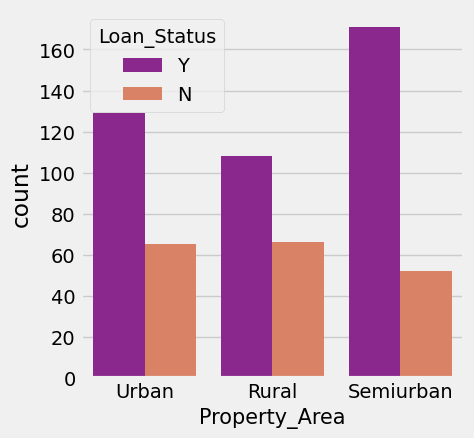

In [146]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue = 'Loan_Status',data = data, palette = 'plasma')
    plt.xlabel(i, fontsize=15)

In [147]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [148]:
#plot tcategorical data with target data

print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [149]:
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [150]:
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [151]:
 print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


# Data prepration

In [152]:
#find categorical data

data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [153]:
#drop unnesseary columns
data = data.drop(['Loan_ID'], axis=1)

In [154]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


# Encoding the data

In [155]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [156]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [157]:
data['Dependents'].value_counts()

0     350
2      98
1      97
3+     46
Name: Dependents, dtype: int64

In [158]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))

data['Dependents'] = data['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))

In [159]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [160]:
# x = data.iloc[:,:-1]
# y = data.Loan_Status
# x.head(5)

In [161]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# x.loc[:,['Gender','Married','Education','Self_Employed','Property_Area','Dependents']] = \
# x.loc[:,['Gender','Married','Education','Self_Employed','Property_Area','Dependents']].apply(enc.fit_transform)
# x.head()

# data divided in to dependant and independant

In [162]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'],axis=1)

In [163]:
x.shape

(591, 11)

In [164]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [165]:
y.shape

(591,)

In [166]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

# Handling Imbalnce data using SMOTE

In [167]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [168]:
from imblearn.over_sampling import SMOTE

In [169]:
# data['Gender'] = data['Gender'].astype(float)

In [52]:
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [170]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 11)
(816,)


In [171]:
y.shape

(591,)

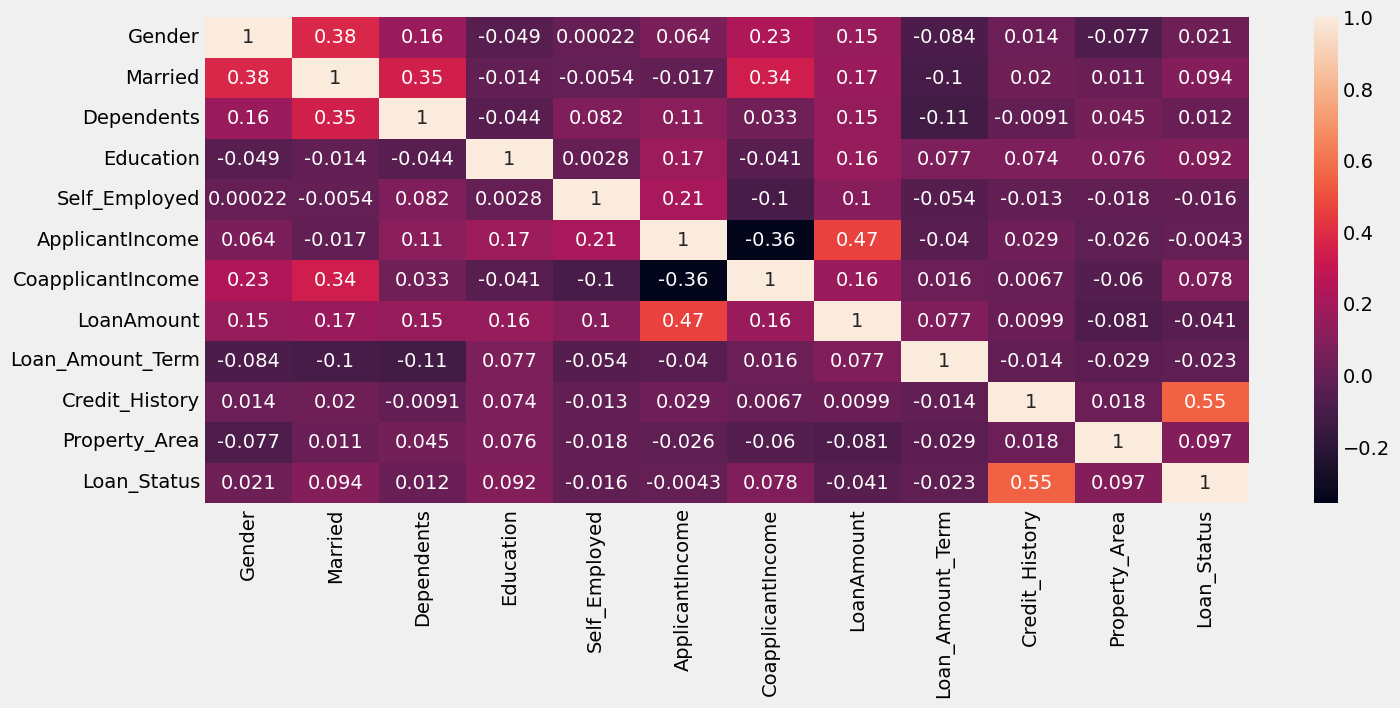

In [172]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# Train test split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)

In [175]:
x_train.shape

(652, 11)

In [176]:
y_test.shape

(164,)

# model Building

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
y_pred = lr.predict(x_test)

In [180]:
print('accuracy of Logisticregression', lr.score(x_test, y_test))

accuracy of Logisticregression 0.7560975609756098


In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
clf = RandomForestClassifier(n_estimators=60)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=60)

In [183]:
y_pred = clf.predict(x_test)

In [184]:
print('accuracy of RandomForestClassifier', clf.score(x_test, y_test))

accuracy of RandomForestClassifier 0.8170731707317073


# check accuracy score for trainin and testing

In [185]:
from sklearn.metrics import accuracy_score

In [186]:
print('Training Accuracy', lr.score(x_train, y_train))
print('Test Accuracy', lr.score(x_test, y_test))

Training Accuracy 0.7914110429447853
Test Accuracy 0.7560975609756098


# check confusion merix

In [187]:
from sklearn.metrics import classification_report

In [188]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.80      0.84      0.82        82

    accuracy                           0.82       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.82      0.82      0.82       164



In [189]:
print('Our model accuracy is:', accuracy_score(y_pred,y_test))

Our model accuracy is: 0.8170731707317073


In [190]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [191]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [192]:
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])

In [193]:
prediction = lr.predict(model_pred)
print(prediction[0])

0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
